<ipython-input-1-fe8d6f5dd72b>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Price'].interpolate(method='linear', inplace=True)
<ipython-input-1-fe8d6f5dd72b>:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_price = df['Price'].resample('M').mean()


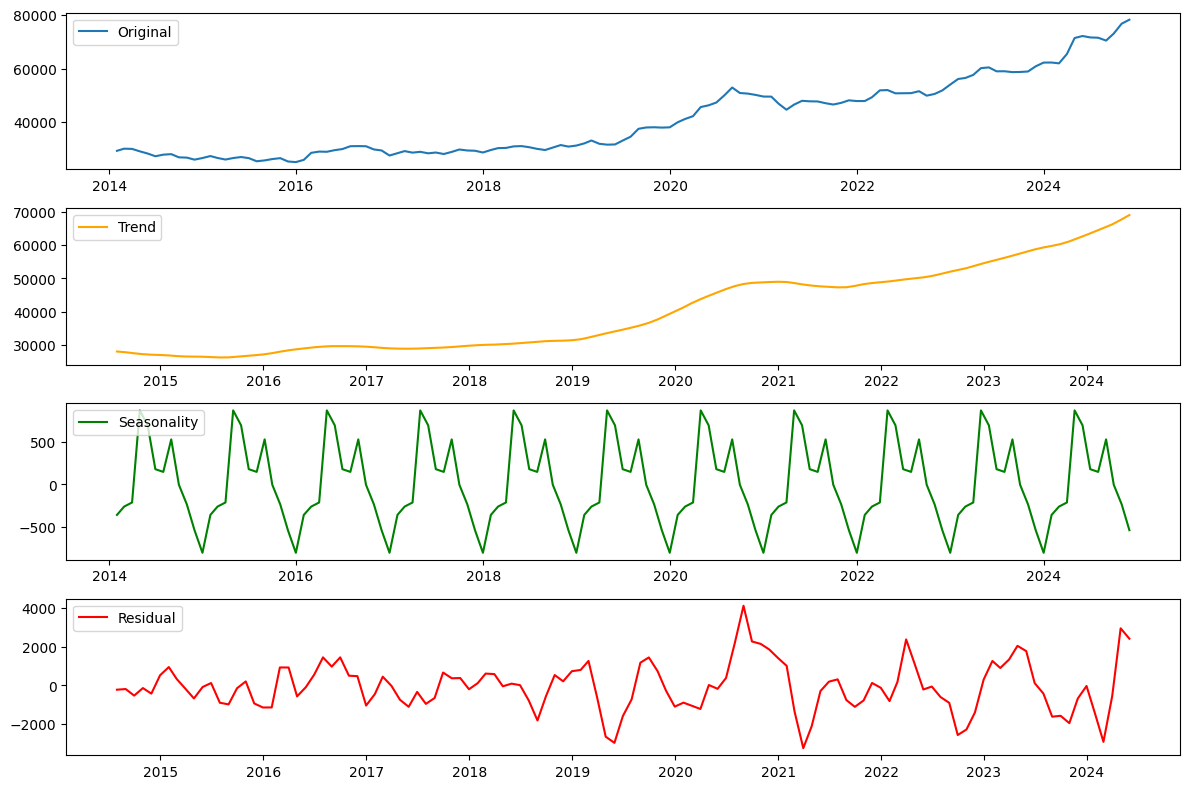

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load and prepare the dataset
df = pd.read_csv("Gold_Price_DataSet.csv", parse_dates=['Date'])
df.sort_values('Date', inplace=True)
df.set_index('Date', inplace=True)

# Check for missing values and fill if necessary
df['Price'].interpolate(method='linear', inplace=True)

# Resample daily data to monthly average (optional but common)
monthly_price = df['Price'].resample('M').mean()

# Drop any remaining NA values
monthly_price.dropna(inplace=True)

# Decompose the time series
result = seasonal_decompose(monthly_price, model='additive', period=12)

# Plot the components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(monthly_price, label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(result.trend, label='Trend', color='orange')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(result.seasonal, label='Seasonality', color='green')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(result.resid, label='Residual', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()
